# 第5章 高级数据处理

## 数值和字符处理函数

In [2]:
ceiling(3.14) # 不小于x的最小整数，天花板
floor(3.14) # 不大于x的最大整数，地板
trunc(-3.15) # 向0的整数部分

[1] 4

[1] 3

[1] -3

In [3]:
# 统计函数
mean(seq(100), trim=0.05) # 截尾平均数

[1] 50.5

In [4]:
diff(seq(100), lag=10) #滞后差分

[1] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[26] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[51] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[76] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [6]:
sd(seq(8))

[1] 2.44949

注意求$sd$的公式是：
$$
\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}
$$

In [7]:
# 数据的标准化
newdata <- scale(seq(10)) # 默认变成均值为0，标准差为1
newdata

-1.4863011
-1.1560120
-0.8257228
-0.4954337
-0.1651446
0.1651446
0.4954337
0.8257228
1.1560120
1.4863011


### 概率函数
各种分布都有：注意
* d: desity
* p: distribution function
* q: qunatile function
* r: random

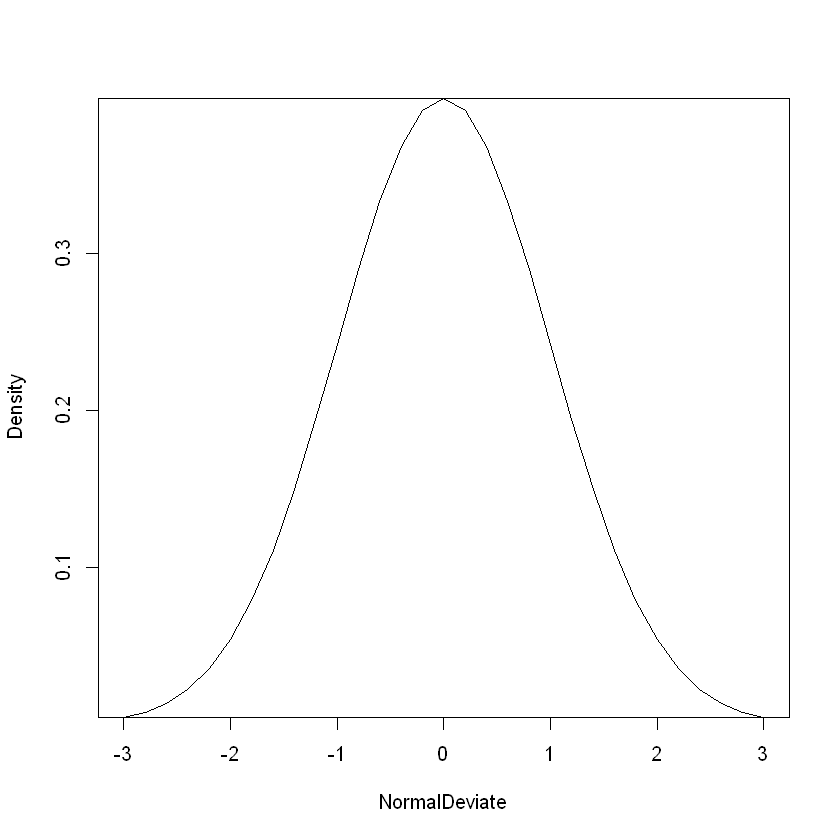

In [11]:
x <- pretty(c(-3,3), 30)
y <- dnorm(x)
plot(x, y,
    type="l",
    xlab="NormalDeviate",
    ylab="Density",
    yaxs="i")

In [16]:
pnorm(1.96)
qnorm(.9544, mean=500, sd=100)
rnorm(50, mean=50, sd=10)

[1] 0.9750021

[1] 668.9101

[1] 50.65621 57.77738 59.99228 66.06129 42.97818 38.77854 62.67254 46.78531
 [9] 41.44379 52.54212 57.80774 46.98398 58.36755 51.32668 40.87377 53.64404
[17] 47.01426 50.67287 59.65357 68.10742 56.61496 34.13718 43.02184 46.61324
[25] 51.55071 60.70462 40.91927 61.22065 47.81110 61.03796 51.27855 43.59028
[33] 55.29638 47.72748 53.98430 60.39372 65.33973 49.58690 52.86564 63.35236
[41] 66.11828 55.70940 51.26027 41.69201 43.10324 65.90534 50.88416 44.09310
[49] 57.29175 58.27580

In [18]:
# 设定随机数种子
runif(5) #生成0-1均匀分布的伪随机数
set.seed(1234)
runif(5)
set.seed(1234)
runif(5)

[1] 0.4482378 0.6303407 0.9061279 0.3324448 0.4003289

[1] 0.1137034 0.6222994 0.6092747 0.6233794 0.8609154

[1] 0.1137034 0.6222994 0.6092747 0.6233794 0.8609154

In [29]:
# 生成服从多元正态分布的数据
library(MASS)
options(digits = 3)
set.seed(1234)
mean <- c(230.7, 146.7, 3.6)
sigma <- matrix(c(15360.8, 6721.2, -47.1,
                 6721.2, 4700.9, -16.5,
                 -47.1, -16.5, 0.3), nrow=3, ncol=3)
mydata <- mvrnorm(500, mean, sigma)
# mydata
mydata <- as.data.frame(mydata) # 转成dataframe
names(mydata) <- c('y', 'x1', 'x2')
head(mydata) # 生成模拟数据

y,x1,x2
98.8,41.3,3.43
244.5,205.2,3.80
375.7,186.7,2.51
-59.2,11.2,4.71
313.0,111.0,3.45
288.8,185.1,2.72


In [44]:
# 字符处理函数
a = c("too young too simple江泽民", 'h', '蛤')
grep('[\u4e00-\u9fa5]', a, fixed=FALSE) # 用正则表达式匹配中文

[1] 1 3

In [46]:
strsplit(a, split = 't') # 字符串切割

[[1]]
[1] ""                "oo young "       "oo simple江泽民"

[[2]]
[1] "h"

[[3]]
[1] "蛤"

In [5]:
length(c(1,2,3,4))
seq(1,10,2)
rep(1:3,2)
cut(seq(10), 9) # 将连续型变量x分割成有n个水平的因子，也就是分组
pretty(seq(10), 4) # 创建美观的分割点


[1] 4

[1] 1 3 5 7 9

[1] 1 2 3 1 2 3

[1] (0.991,2] (0.991,2] (2,3]     (3,4]     (4,5]     (5,6]     (6,7]    
 [8] (7,8]     (8,9]     (9,10]   
Levels: (0.991,2] (2,3] (3,4] (4,5] (5,6] (6,7] (7,8] (8,9] (9,10]

[1]  0  2  4  6  8 10

In [10]:
# R函数自带多态
# 可以用于scalar, vector, matrix, array and dataframe
c <- matrix(runif(12), nrow=3)
log(c)

-0.52187778,-0.08736959,-1.45042189,-0.0432104
-0.47082527,-0.02940921,-0.05720386,-0.6227232
-0.02454391,-2.23646166,-1.65413322,-1.0133182


In [17]:
# apply函数
set.seed(1234)
mydata <- matrix(rnorm(30), nrow = 6)
apply(mydata, 1, mean) # 行均值
apply(mydata, 2, sum) # 列求和

[1] -0.8177903  0.1525773  0.4376654 -0.9720725 -0.2029527 -0.3759770

[1] -1.255712 -4.051441 -1.284791  1.241107 -3.541912

In [19]:
# 复杂数据处理势力
options(digits=2)
Student <- c("John Davis", "Angela Williams", "Bullwinkle Moose",
             "David Jones", "Janice Markhammer", "Cheryl Cushing",
             "Reuven Ytzrhak", "Greg Knox", "Joel England",
             "Mary Rayburn")
Math <- c(502, 600, 412, 358, 495, 512, 410, 625, 573, 522)
Science <- c(95, 99, 80, 82, 75, 85, 80, 95, 89, 86)
English <- c(25, 22, 18, 15, 20, 28, 15, 30, 27, 18)

roster <- data.frame(Student, Math, Science, English,
                     stringsAsFactors=FALSE)
z <- scale(roster[,2:4]) # 对math, science, english做归一化：均值0，标准差1
score <- apply(z, 1, mean) # 求平均得分
roster <- cbind(roster, score) # 按行合并

y <- quantile(score, c(.8,.6,.4,.2)) # 确定百分位数
roster$grade[score >= y[1]] <- "A"
roster$grade[score < y[1] & score >= y[2]] <- "B"
roster$grade[score < y[2] & score >= y[3]] <- "C"
roster$grade[score < y[3] & score >= y[4]] <- "D"
roster$grade[score < y[4]] <- "F"

name <- strsplit((roster$Student), " ") # 按空格分割名字
Lastname <- sapply(name, "[", 2) # 
Firstname <- sapply(name, "[", 1)
roster <- cbind(Firstname,Lastname, roster[,-1])
roster <- roster[order(Lastname,Firstname),]
roster

Student,Math,Science,English
John Davis,502,95,25
Angela Williams,600,99,22
Bullwinkle Moose,412,80,18
David Jones,358,82,15
Janice Markhammer,495,75,20
Cheryl Cushing,512,85,28
Reuven Ytzrhak,410,80,15
Greg Knox,625,95,30
Joel England,573,89,27
Mary Rayburn,522,86,18


Math,Science,English
0.013,1.078,0.587
1.143,1.591,0.037
-1.026,-0.847,-0.697
-1.649,-0.590,-1.247
-0.068,-1.489,-0.330
0.128,-0.205,1.137
-1.049,-0.847,-1.247
1.432,1.078,1.504
0.832,0.308,0.954
0.243,-0.077,-0.697


,Firstname,Lastname,Math,Science,English,score,grade
6,Cheryl,Cushing,512,85,28,0.35,C
1,John,Davis,502,95,25,0.56,B
9,Joel,England,573,89,27,0.70,B
4,David,Jones,358,82,15,-1.16,F
8,Greg,Knox,625,95,30,1.34,A
5,Janice,Markhammer,495,75,20,-0.63,D
3,Bullwinkle,Moose,412,80,18,-0.86,D
10,Mary,Rayburn,522,86,18,-0.18,C
2,Angela,Williams,600,99,22,0.92,A
7,Reuven,Ytzrhak,410,80,15,-1.05,F


## 控制流

In [2]:
# for
for (i in 1:10) print(i)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [4]:
# while
i <- 10
while(i > 0) {print(i); i<- i - 1}

[1] 10
[1] 9
[1] 8
[1] 7
[1] 6
[1] 5
[1] 4
[1] 3
[1] 2
[1] 1


In [10]:
# 自编函数
mystats <- function(x, parametric=TRUE, print=FALSE){ # 带了默认参数
    if (parametric){
        center <- mean(x); spread <- sd(x)
    }
    else{
        center <- median(x); spread <- mad(x)
    }
    if (print & parametric){
        cat("Mean=", center, "\n", "SD=", spread, "\n")
    } else if (print & !parametric){
        cat("Median=", center, "\n", "MAD=", spread, "\n")
    } 
}
set.seed(1234)
x <- rnorm(500)
y <- mystats(x, parametric = FALSE, print=TRUE)

Median= -0.02070734 
 MAD= 1.000984 


## 整合与重构

In [1]:
# 转置
cars <- mtcars[1:5, 1:4]
cars
t(cars)

,mpg,cyl,disp,hp
Mazda RX4,21.0,6,160,110
Mazda RX4 Wag,21.0,6,160,110
Datsun 710,22.8,4,108,93
Hornet 4 Drive,21.4,6,258,110
Hornet Sportabout,18.7,8,360,175


,Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout
mpg,21,21,22.8,21.4,18.7
cyl,6,6,4.0,6.0,8.0
disp,160,160,108.0,258.0,360.0
hp,110,110,93.0,110.0,175.0


In [23]:
# reshape包
# install.packages('reshape')
library(reshape)
# melt
ID <- c(1,1,2,2)
Time <- c(1,2,1,2)
X1 <- c(5,3,6,2)
X2 <- c(6,5,1,4)
mydata <- matrix(c(ID, Time, X1, X2), nrow=4, ncol=4)
mydata <- as.data.frame(mydata)
names(mydata) <- c('ID', 'Time', 'X1', 'X2')
cat('mydata')
mydata
md <- melt(mydata, id=(c('ID', 'Time'))) # 通过id确定Variable的值
cat('melt by ID and Time')
md
cat('melt by ID')
md <- melt(mydata, id=(c('ID')))
md
md <- melt(mydata, id=(c('ID', 'Time')))

mydata

ID,Time,X1,X2
1,1,5,6
1,2,3,5
2,1,6,1
2,2,2,4


melt by ID and Time

ID,Time,variable,value
1,1,X1,5
1,2,X1,3
2,1,X1,6
2,2,X1,2
1,1,X2,6
1,2,X2,5
2,1,X2,1
2,2,X2,4


melt by ID

ID,variable,value
1,Time,1
1,Time,2
2,Time,1
2,Time,2
1,X1,5
1,X1,3
2,X1,6
2,X1,2
1,X2,6
1,X2,5


In [32]:
# cast重铸
# 读取已融合的数据，来整合函数
newdata <- cast(md, ID~variable,mean)
newdata # ID为1的X1平均值为4，以此类推
newdata <- cast(md, Time~variable, mean)
newdata

# 不执行整合
cast(md, ID+Time~variable) # 以ID+Time为基的感觉
cast(md, ID+variable~Time) # 以ID+X1为基，但是呢同样的ID和X1会对应两种情况（以Time确定）
cast(md, ID~variable+Time) # 以ID为基，以variable和Time确定列

ID,X1,X2
1,4,5.5
2,4,2.5


Time,X1,X2
1,5.5,3.5
2,2.5,4.5


ID,Time,X1,X2
1,1,5,6
1,2,3,5
2,1,6,1
2,2,2,4


ID,variable,1,2
1,X1,5,3
1,X2,6,5
2,X1,6,2
2,X2,1,4


ID,X1_1,X1_2,X2_1,X2_2
1,5,3,6,5
2,6,2,1,4
